<a href="https://colab.research.google.com/github/RogerPineda13/Healthcare_Persistency_of_a_drug/blob/main/Week12/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV

from sklearn.metrics import precision_score, recall_score, log_loss, plot_confusion_matrix,\
accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
# function to calculate different types of model scores and cross validation score.
# at the end of the function, confusion matrix is plotted

def model_score(model, X, y_predict, y_true):
    acc = accuracy_score(y_predict, y_true)
    rec = recall_score(y_predict, y_true, average='weighted')
    f1 = f1_score(y_predict, y_true, average='weighted')
    prec = precision_score(y_predict, y_true, average='weighted')
    cross = cross_val_score(estimator=model, X=X, y=y_true, cv=10).mean()
    
    print(f' The accuracy score is: {round(acc, 4)}')
    print(f' The cross validation score of accuracy is: {round(cross, 4)}')
    print(f' The recall score is: {round(rec, 4)}')
    print(f' The F1 score is: {round(f1, 4)}')
    print(f' The precision score is: {round(prec, 4)}')
    
    return plot_confusion_matrix(model, X, y_true);

def roc_auc_curve(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC AUC CURVE")
  plt.show()



In [4]:
#Bringing in Data
from google.colab import files
uploaded = files.upload()

Saving data_m.pkl to data_m (1).pkl


In [5]:
#Saving into DF
with open('data_m.pkl', 'rb') as datapickled:
    data_df=pickle.load(datapickled)
     

In [6]:
data_df.head()

,Persistency_Flag,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,...,Adherent_Flag_Adherent,Adherent_Flag_Non-Adherent,Count_Of_Risks_0,Count_Of_Risks_1,Count_Of_Risks_2,Count_Of_Risks_3,Count_Of_Risks_4,Count_Of_Risks_5,Count_Of_Risks_6,Count_Of_Risks_7
0,1,0,0,0.0,0,0,0,0,1,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0.0,0,0,0,0,1,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0.0,0,0,0,0,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1,0.0,0,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,0.0,0,0,0,0,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#Train Test Split
X = data_df.drop(['Persistency_Flag'], axis=1)
y = data_df['Persistency_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0.6291970802919709


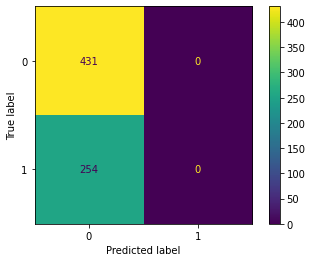

In [8]:
#Dummy Regressor as a baseline
dummy = DummyClassifier(random_state=42)
dummy.fit(X_train, y_train)
print(dummy.score(X_test, y_test))

plot_confusion_matrix(dummy, X_test, y_test);

Modeling

Training data model score:
 The accuracy score is: 0.8237
 The cross validation score of accuracy is: 0.8091
 The recall score is: 0.8237
 The F1 score is: 0.8259
 The precision score is: 0.8309


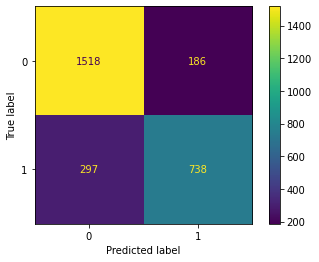

In [34]:
#Logistic Regression 
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_y_pred_train = logistic_model.predict(X_train)

print("Training data model score:")
#Confusion Matrix
log_train_score = model_score(logistic_model, X_train, logistic_y_pred_train, y_train)

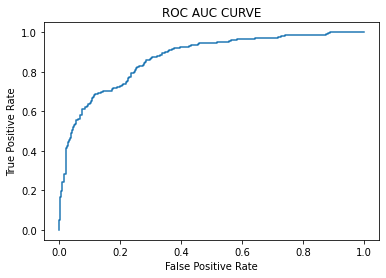

In [35]:
#ROC AUC Curve
log_pred_proba = logistic_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, log_pred_proba)

roc_auc_curve(fpr,tpr)


In [10]:
#KNN Classifier
knn = KNeighborsClassifier()

#Creating a grid search to hypertune model
grid = {
    'n_neighbors' : [1,2,3,4,5,6,7],
    'p' : [1,2],
    'leaf_size' : [10,20,30]
}
knn_grid_search = GridSearchCV(knn, grid, cv=3)
knn_grid_search.fit(X_train, y_train)

print(f'Best parameters are {knn_grid_search.best_params_}')
print(f'Best score {knn_grid_search.best_score_}')
print(f'Best estimator score {knn_grid_search.best_estimator_.score(X_test, y_test)}')

Best parameters are {'leaf_size': 10, 'n_neighbors': 7, 'p': 1}
Best score 0.7550200803212851
Best estimator score 0.7605839416058394


Training data model score:
 The accuracy score is: 0.8207
 The cross validation score of accuracy is: 0.7528
 The recall score is: 0.8207
 The F1 score is: 0.8304
 The precision score is: 0.8662


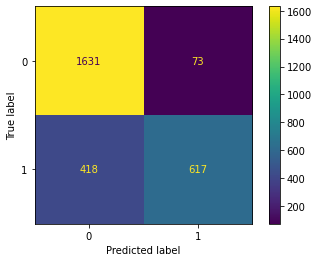

In [11]:
#Generating model with hyperparameters
knn = KNeighborsClassifier(p=1,leaf_size=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_train)

print("Training data model score:")
knn_model_score = model_score(knn, X_train, knn_pred, y_train)

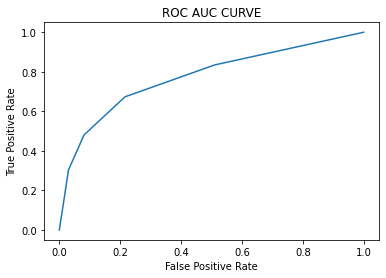

In [37]:
#ROC AUC Curve
knn_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, knn_pred_proba)

roc_auc_curve(fpr,tpr)

In [12]:
#Decison Tree Classifier
dt = DecisionTreeClassifier()
#Creating Grid Search for hypertuning
dt_grid = {
  'criterion' : ['entropy', 'gini'],
    'max_depth': [10,20,30,40,50,60, None],
    'min_samples_split' : [1, 2, 5, 10, 20, 30],
    'min_impurity_decrease' : [0.0, 0.1, 0.2, 0.3,0.4, 0.5]
}
dt_grid_s = GridSearchCV(estimator=dt , param_grid=dt_grid, cv=5)
dt_grid_s.fit(X_train, y_train)

print(f'Best parameters are {dt_grid_s.best_params_}')
print(f'Best score {dt_grid_s.best_score_}')
print(f'Best estimator score {dt_grid_s.best_estimator_.score(X_test, y_test)}')


Best parameters are {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0.0, 'min_samples_split': 30}
Best score 0.7867819159583127
Best estimator score 0.7664233576642335


Training data model score:
 The accuracy score is: 0.7875
 The cross validation score of accuracy is: 0.7875
 The recall score is: 0.7875
 The F1 score is: 0.7995
 The precision score is: 0.8378


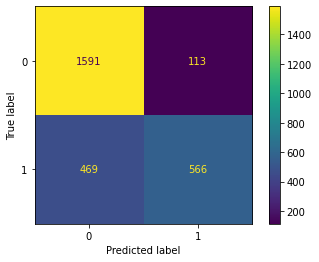

In [13]:
#Using hyperparameters found in grid search
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=10, min_impurity_decrease =.1, min_samples_split = 2, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_train)

print("Training data model score:")
dt_model_score = model_score(dt, X_train, dt_pred, y_train)

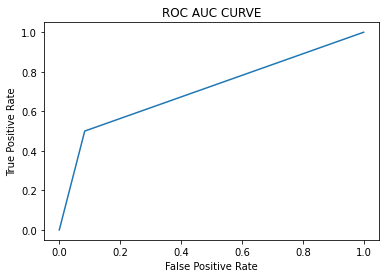

In [38]:
#ROC AUC Curve
dt_pred_proba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, dt_pred_proba)

roc_auc_curve(fpr,tpr)

In [14]:
#Random Forest Classifier
rf = RandomForestClassifier()
#Creating Grid Search
grid = {
    'criterion' : ['entropy', 'gini'],
    'max_depth': [5,10,15,20, None],
    'min_impurity_decrease' : [0.0, 0.1, 0.2, 0.3,0.4, 0.5], 
    'bootstrap' : [False, True] 
}
gs = GridSearchCV(estimator=rf , param_grid=grid, cv=5)
gs.fit(X_train, y_train)

print(f'Best parameters are {gs.best_params_}')
print(f'Best score {gs.best_score_}')
print(f'Best estimator score {gs.best_estimator_.score(X_test, y_test)}')

Best parameters are {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'min_impurity_decrease': 0.0}
Best score 0.8174495256141663
Best estimator score 0.7824817518248175


Training data model score:
 The accuracy score is: 0.977
 The cross validation score of accuracy is: 0.8167
 The recall score is: 0.977
 The F1 score is: 0.9771
 The precision score is: 0.9783


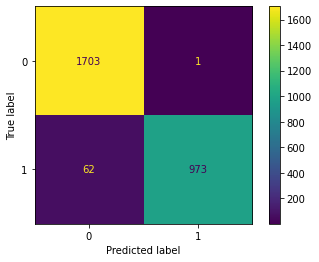

In [15]:
#Using hyperparameters
rf = RandomForestClassifier(max_depth = 15, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_train)

print("Training data model score:")
rf_model_score = model_score(rf, X_train, rf_pred, y_train)

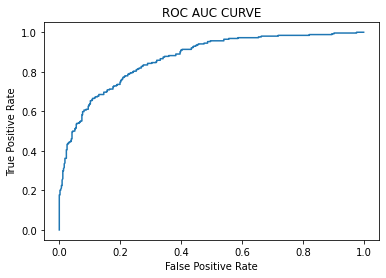

In [39]:
#ROC AUC Curve
rf_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, rf_pred_proba)

roc_auc_curve(fpr,tpr)

The main evaulator in this use case is accuracy. Seeing the tuned Random Forest Classifier has the highest accuracy it is the model that will be used.